# Лабораторная работа 4
**Тема.** Обыкновенные дифференциальные уравнения 1-го порядка
<br>
**Цель.** Научиться графически и аналитически находить общее и частное решение основных типов уравнений 1-го порядка, строить для геометрических задач простейшие модели в виде дифференциального уравнения 1-го порядка и контролировать результаты с помощью средств СКА.

## **Задание 1.** Для данного дифференциального уравнения методом изоклин постройте интегральную кривую, проходящую через точку $ M $.

В **Sagemath** для работы с простыми дифференциальными уравнениями используются функции, объедененные под префиксом `dsolve`. Сама по себе функция `dsolve()` дает общее решение для обыкновенного дифференциального уравнения первого и воторого порядка.

In [1]:
x = var('x')
y = function('y')(x)
de = diff(y,x) * y == -2 * x
show(de)

y(x)*diff(y(x), x) == -2*x

In [2]:
general_solution = desolve(de, y)
show(general_solution)

-1/4*y(x)^2 == 1/2*x^2 + _C

В качестве опционального аргумента можно указать `ics` (the initial or boundary conditions):
- для дифференциальных уравнений первого порядка указываются начальные значения $ x $ и $ y $ (т.е. `[x_0, y_0]`);
- для уравнений вторрого порядка можно указать еще и начальное значение $ \frac{\partial y}{\partial x} $ (т.е. `[x_0, y_0, y_diff]`);
- если нужны пограничные значения второго порядка, то указываются как начальные, так и конечные границы (т.е. `[x_0, y_0, x_1, y_1]`).

Решим уравнения относительно заданной точки.

In [3]:
m_x = 0
m_y = 5

general_solution = desolve(de, y, ics=[m_x, m_y])
show(general_solution)

-1/4*y(x)^2 == 1/2*x^2 - 25/4

Как видно, решение не выявлено в явной форме. Выразим $ y(x) $.

In [4]:
general_solution = solve(general_solution, y)
show(general_solution)

[y(x) == -sqrt(-2*x^2 + 25), y(x) == sqrt(-2*x^2 + 25)]

Мы получили две прямой, что вполне ожидаемо, как покажет далее поле направлений. Однако по заданию необходимо оставить тольку ту прямую, которая пройдет через точку $ M $.

In [5]:
if general_solution[0].subs(x=m_x) == m_y:
    sol_curve = general_solution[0]
else:
    sol_curve = general_solution[1]
show(sol_curve)

y(x) == sqrt(-2*x^2 + 25)

Теперь необходимо построить поле направлений. Для этого преобразуем уравнение первого порядка в систему уравнений.
$$
\begin{cases}
      \frac{\partial x}{\partial t} = 1\\
      \frac{\partial y}{\partial t} = - \frac{2x}{y}
\end{cases}
$$
Для построения частного решения через точку $ (0, 5) $ возьмем правую сторону получившегося решения.

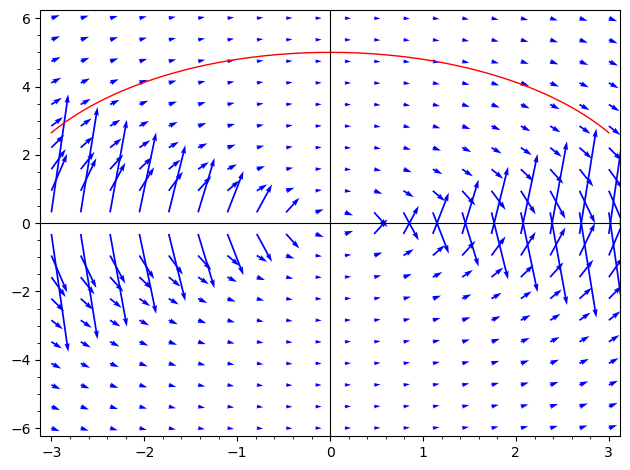

In [6]:
f(x, y) = 1
g(x, y) = -2 * x / y

curve = plot(sol_curve.rhs() , (x, -3, 3), color='red')
vec_field = plot_vector_field((f, g), (x, -3, 3), (y, -6, 6), color='blue')

show(curve + vec_field)

## **Задание 2.** Найдите линию, проходящую через точку $ M_{0} $, и обладающую тем свойством, что в любой ее точке $ M $ нормальный вектор $ \vec{MN} $ с концом на оси $ Oy $ имеет длину, равную $ a $, и образует острый угол с положительным направлением оси $ Oy $.

In [7]:
x = var('x')
y = function('y')(x)

m_x = 9
m_y = 3
a = 15

In [8]:
de = diff(y,x) - x / (-sqrt(225 - x ^ 2 ))
general_solution = desolve(de, y, ics=[m_x, m_y])
show(general_solution)

sqrt(-x^2 + 225) - 9

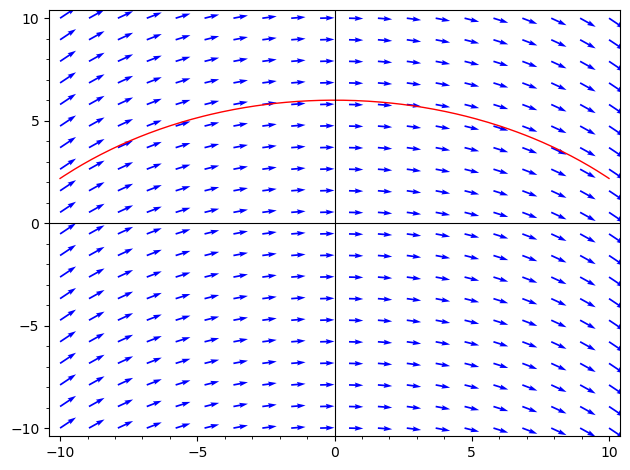

In [9]:
f(x, y) = 1
g(x, y) = x / (-sqrt(225 - x^2))

curve = plot(general_solution, (x, -10, 10), color='red')
vec_field = plot_vector_field((f, g), (x, -10, 10), (y, -10, 10), color='blue')

show(curve + vec_field)

2) Найдите линию, проходящую через точку $ M_{0} $, и обладающую тем свойством, что в любой ее точке $ M $ касательный вектор $ \vec{MN} $ с концом на оси $ Ox $ имеет проекцию на ось $ Ox $, обратно пропорциональную абсциссе точки $ M $. Коэффициент пропорциональности равен $ a $. Сделайте чертеж.

In [10]:
x = var('x')
y = function('y')(x)
C = var('C')

m_x = 2
m_y = e
a = -2

In [11]:
de = diff(y,x) == (y * x / a)
general_solution = desolve(de, y, ics=[m_x, m_y])
eq = general_solution == C
show(eq)

e^(-1/4*x^2)*y(x)^2 == C

In [12]:
general_solution = solve(eq, y)
show(general_solution)

[y(x) == -sqrt(C)*e^(1/8*x^2), y(x) == sqrt(C)*e^(1/8*x^2)]

In [13]:
if general_solution[0].subs(x=m_x,C=1) == m_y:
    sol_curve = general_solution[0]
else:
    sol_curve = general_solution[1]
show(sol_curve)

y(x) == sqrt(C)*e^(1/8*x^2)

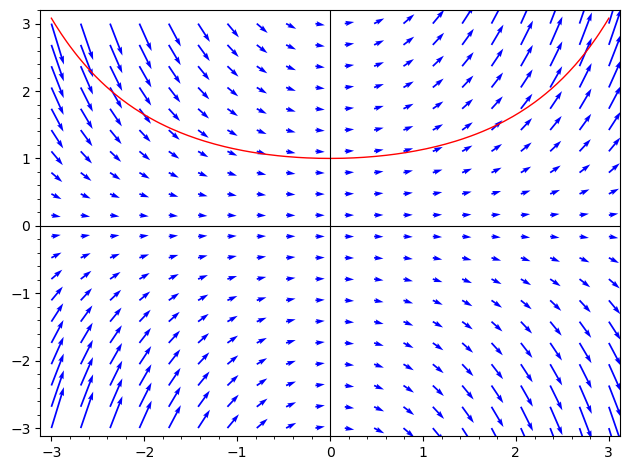

In [14]:
f(x, y) = 1
g(x, y) = - (y * x / a)

curve = plot(sol_curve.rhs().subs(C=1), (x, -3, 3), color='red')
vec_field = plot_vector_field((f, g), (x, -3, 3), (y, -3, 3), color='blue')

show(curve + vec_field)

## **Задание 3.** Найдите общий интеграл уравнения. Постройте на одном чертеже вблизи особой точки уравнения поле направлений и какую-либо интегральную кривую. Сделайте вывод о типе особой точки.

In [15]:
x = var('x')
y = function('y')(x)

de = diff(y,x) == (-15 * x + y + 13) / (9 * x + y -11)

В данном случае на вход подается уравнение Лагранжа. Это уравнение специального типа, для решения таких в Sage для `dsolve` предусмотрен специальный флаг `contrib_ode`, который во время решения производит необходимые подстановки. Благодаря этому он способен решать уравнения Клода, Лагранжа, Риккати и другие.

In [16]:
general_solution = desolve(de, y, contrib_ode=True)
show(general_solution)

[-2*log(5*x + y(x) - 7) + 3*log(3*x + y(x) - 5) == _C]

По условию необходимо найти особую точку, для этого решим систему уравнений

In [17]:
x_point = var('x_p')
y_point = var('y_p')

result = solve([-15 * x_point + y_point + 13 == 0, 9 * x_point + y_point -11 == 0], x_point, y_point)
show(result)

[[x_p == 1, y_p == 2]]

Найдем решение в специальной точке и достроим интегральную кривую. Так как нет решения в явном виде используем `desolve_rk4`. Здесь применяется алгоритм Рунге-Кутта 4-го порядка для нахождения серии численных решений. 

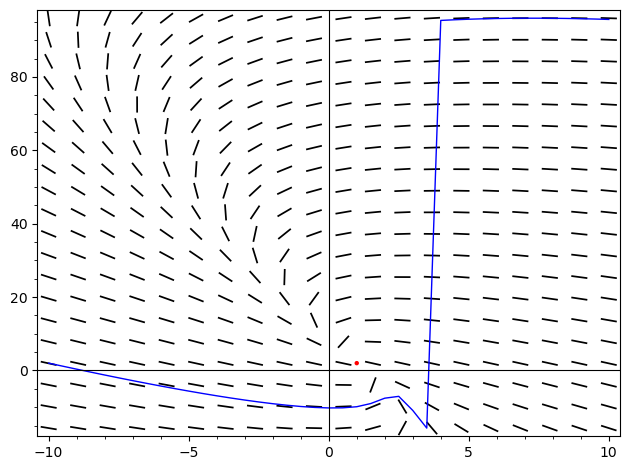

In [18]:
pts = desolve_rk4(de, y, ics=[-10, 2], end_points=10, step=0.5,output='slope_field')
show(pts + list_plot([[1,2]], color='red'))

## **Задание 4.** Найдите решение задачи Коши. Сделайте чертеж интеграль ной кривой.

In [19]:
x = var('x')
y = function('y')(x)

m_x = 1/2
m_y = 1

de = diff(y,x) * x + y == 2 * y ^ 2 * ln(x)

In [20]:
general_solution = desolve(de, y, ics=[m_x, m_y])
show(general_solution)

1/2/(x*(2*log(2) - 1) + log(x) + 1)

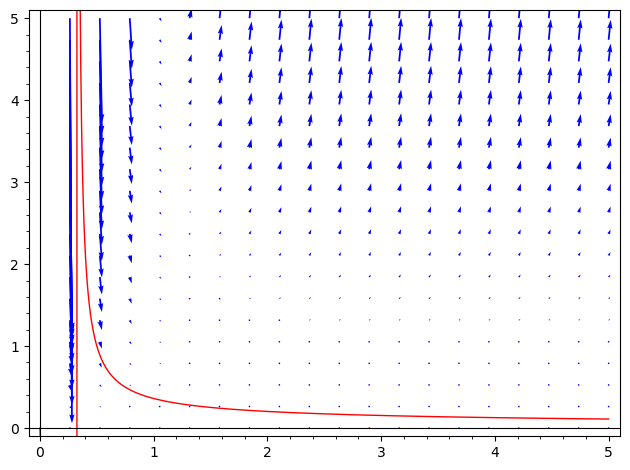

In [21]:
f(x, y) = 1
g(x, y) = (2 * y ^ 2 * ln(x) - y)/x

curve = plot(general_solution, (x, 0, 5), ymax=5, ymin = 0, color='red')
vec_field = plot_vector_field((f, g), (x, 0, 5), (y, 0, 5), color='blue')

show(curve + vec_field)

## **Задание 5.** Решите дифференциальные уравнения. Постройте в одной системе координат интегральные кривые при целых значениях произвольной постоянной от -1 до 1.

Решим первое уравнение

In [22]:
x = var('x')
y = function('y')(x)

de_1 = x == 2 * diff(y, x) * arctan(diff(y, x)) - ln(diff(y, x)^2 + 1)
show(de_1)

x == 2*arctan(diff(y(x), x))*diff(y(x), x) - log(diff(y(x), x)^2 + 1)

`desolve` не может решить это уравнение в текущем виде. Необходимо решать параметрически. Подставим `p` вместо $ \frac{\partial}{\partial x} y $

In [23]:
p = var('p')
x_p = p*arcsin(p) + sqrt(1 - p^2)
show(x_p)

p*arcsin(p) + sqrt(-p^2 + 1)

Найдем $ y(p) $

In [24]:
dxdp = diff(x_p, p)
dydp = p * dxdp
show(dydp)

p*arcsin(p)

Возьмем интеграл

In [25]:
C = var('C')
y_p = integrate(dydp, p) + C
show(y_p.simplify_full())

1/4*(2*p^2 - 1)*arcsin(p) + 1/4*sqrt(-p^2 + 1)*p + C

Построим параметрические графики с помощью `parametric_plot`

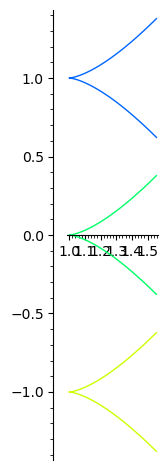

In [26]:
curves = [parametric_plot((x_p, y_p.subs(C=k)), (p, -0.99, 0.99), color=hue((k+2)/5))
          for k in [-1,0,1]]

show(sum(curves))

Решим второе уравнение

In [27]:
x = var('x')
y = function('y')(x)

de_2 = y == diff(y, x) * cosh(diff(y, x)) - sinh(diff(y, x))
show(de_2)

y(x) == cosh(diff(y(x), x))*diff(y(x), x) - sinh(diff(y(x), x))

In [28]:
general_solution = desolve(de_2, y, contrib_ode=True)
show(general_solution)

[[x == _C + cosh(t), y(x) == t*cosh(t) - sinh(t)]]

Получилось параметрическое решение:
$$
\begin{cases}
    x(t) = C + cosh(t)\\
    y(t) = tcosh(t) - sinh(t)
\end{cases}
$$
Построим параметрический график для $ C = [-1..1] $

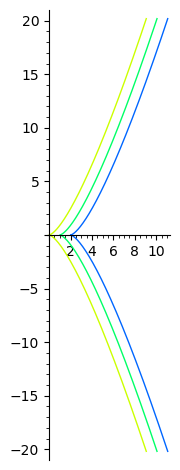

In [29]:
t, C = var('t C')

x_t = C + cosh(t)
y_t = t * cosh(t) - sinh(t)

curves = [parametric_plot((x_t.subs(C=k), y_t), (t, -3, 3), color=hue((k+2)/5))
          for k in [-1, 0, 1]]

show(sum(curves))

## **Задание 6.** Найдите все решения уравнения. Постройте в одной системе координат график особого решения и интегральных кривых при целых значениях произвольной постоянной от -3 до 3.

In [30]:
x = var('x')
y = function('y')(x)

de = y == x * diff(y, x) + diff(y, x) ^ 2 - 1
show(de)

y(x) == x*diff(y(x), x) + diff(y(x), x)^2 - 1

In [31]:
general_solution = desolve(de, y, contrib_ode=True)
show(general_solution)

[y(x) == _C^2 + _C*x - 1, y(x) == -1/4*x^2 - 1]

Осбое решение (решение, которое было найдено отдельно от общего семейства интегральных кривых) в данном случае это:
$$
y(x) = - \frac{1}{4}x^2 - 1
$$
Построим интегральные кривые в заданном промежутке и график особого решения.

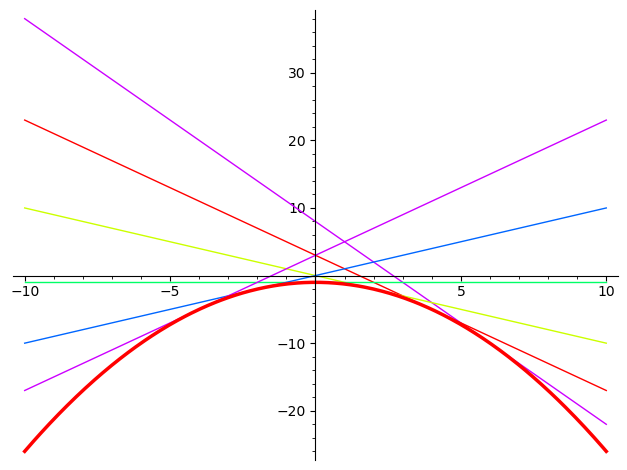

In [32]:
C = var('C')
integr_curve = C^2 + C*x - 1

special_plot = plot(general_solution[1].rhs(), (x, -10, 10), color='red', thickness=2.5)
curves = [plot(integr_curve.subs(C=k), (x, -10, 10), color=hue((k+2)/5))
          for k in range(-3,3)]
show(sum(curves) + special_plot)